## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

In [1]:
# Does the personality affect personal left_handedness?

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./data.csv', sep='\t')

---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

In [4]:
# Because left-handers tend to have more self-esteem than others,
# The features that could be useful are the features that represent the self-esteem measurement.

# Q2	I have thought about dying my hair.
# Q3	I have thrown knives, axes or other sharp things.
# Q15	I have thought it would be exciting to be an outlaw.
# Q27	I think a natural disaster would be kind of exciting.
# Q28	I wear a blanket around the house.
# Q40	I really like dancing.

# Cite: https://www.sciencedirect.com/science/article/abs/pii/S0092656684710166

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

#### Cleaning Data 
---

In [5]:
# Check data shape and head
print(df.shape)
df.head(10)

(4184, 56)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3
5,5,4,2,2,1,1,3,3,3,1,...,US,2,1,59,4,1,1,6,7,1
6,3,4,4,4,1,4,3,5,5,4,...,GR,2,2,15,2,2,1,6,1,1
7,1,2,1,1,1,4,1,2,5,3,...,GR,2,2,14,1,2,0,6,1,1
8,1,5,1,2,2,4,3,2,2,3,...,GR,2,2,16,2,2,0,6,2,1
9,1,4,3,1,1,3,5,2,2,5,...,US,2,2,15,2,3,5,6,1,2


In [6]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)[:5]

## There are no missing values

Q1     0
Q2     0
Q31    0
Q32    0
Q33    0
dtype: int64

In [7]:
# Check data types
df.dtypes

# Data looks okay, only contry variable is object.

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [8]:
# Check obvious outliers
df.describe().T

# No obvious outliers.

,count,mean,std,min,25%,50%,75%,max
Q1,4184.0,1.962715,1.360291,0.0,1.0,1.0,3.00,5.0
Q2,4184.0,3.829589,1.551683,0.0,3.0,5.0,5.00,5.0
Q3,4184.0,2.846558,1.664804,0.0,1.0,3.0,5.00,5.0
Q4,4184.0,3.186902,1.476879,0.0,2.0,3.0,5.00,5.0
Q5,4184.0,2.865440,1.545798,0.0,1.0,3.0,4.00,5.0
Q6,4184.0,3.672084,1.342238,0.0,3.0,4.0,5.00,5.0
Q7,4184.0,3.216539,1.490733,0.0,2.0,3.0,5.00,5.0
Q8,4184.0,3.184512,1.387382,0.0,2.0,3.0,4.00,5.0
Q9,4184.0,2.761233,1.511805,0.0,1.0,3.0,4.00,5.0
Q10,4184.0,3.522945,1.242890,0.0,3.0,4.0,5.00,5.0


#### EDA 
---

In [9]:
# Number of left-handed
df['hand'].value_counts(normalize=True).sort_index() * 100

# There are some observations that have no data in 'hand' column (hand column = 0).
## The missing data need to be dropped.

# The righ-handers are dominant. 84% of dataset.
# Only 10% of sample are left-handed.
# And 4% are good at both hands.

0     0.262906
1    84.655832
2    10.803059
3     4.278203
Name: hand, dtype: float64

In [10]:
# Show number of observations
df['hand'].value_counts().sort_index()

0      11
1    3542
2     452
3     179
Name: hand, dtype: int64

In [11]:
# Check shape before dropping data
df.shape

(4184, 56)

In [12]:
# Drop data that 'hand' column = 0
df = df[df['hand'] != 0]

# Check data after dropping
df.shape

(4173, 56)

In [13]:
# As 'hand' column contains value 3, which means both hands are used to write with,
# We can remove value 3 to focus on left and right handed
df = df[df['hand'] != 3]
df['is_lefthand'] = df['hand'].map({1: 0, 2: 1})

# Check data after dropping
df.shape

(3994, 57)

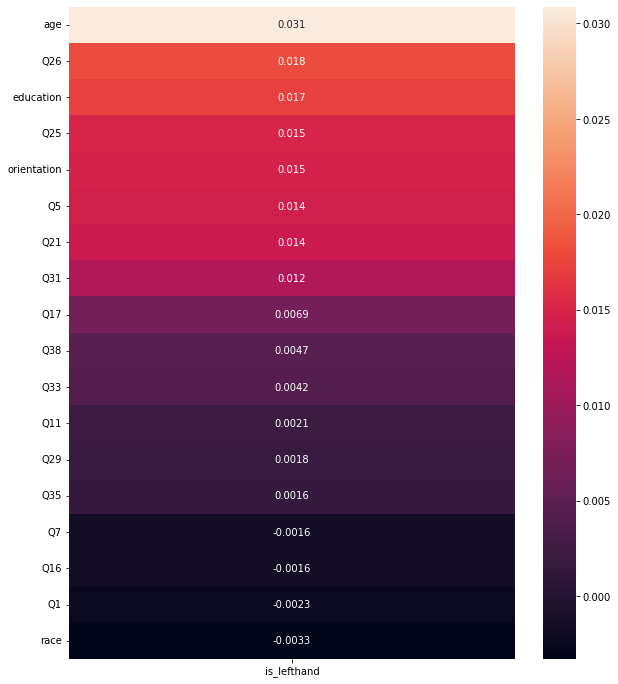

In [14]:
# Calculate correlation with 'is_lefthand' column - Descending
plt.figure(figsize=(10,12))
sns.heatmap(df.corr()[['is_lefthand']].sort_values(by='is_lefthand', ascending=False)[2:20],
           annot=True);

## Correlation with left-handed for every variable is very low both positive and negative sides.

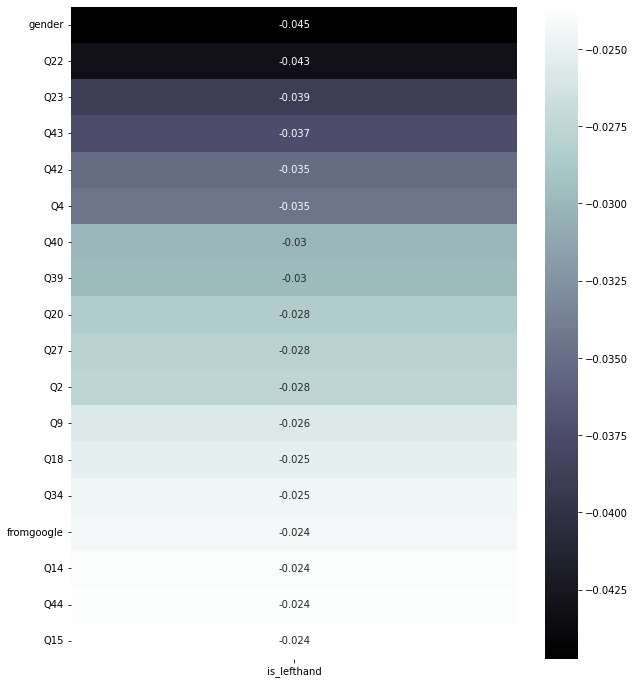

In [15]:
# Calculate correlation with 'is_lefthand' column - Ascending
plt.figure(figsize=(10,12))
sns.heatmap(df.corr()[['is_lefthand']].sort_values(by='is_lefthand', ascending=True)[2:20],
           annot=True, cmap='bone');

### Calculate and interpret the baseline accuracy rate:

In [16]:
df['is_lefthand'].value_counts(normalize=True)

# If dominant value were used to be predicted values, 
# accuracy would be ~88.68%

0    0.88683
1    0.11317
Name: is_lefthand, dtype: float64

### Short answer questions:

In this lab you'll use K-nearest neighbors and logistic regression to model handedness based off of psychological factors. Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

In [17]:
# Regression is used to predict continuous target variable
# while classification aims to predict discrete target variable.
## For example, left-hander and right-hander, type of iris flower.

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

In [18]:
# k is how manay datapoints that will be evaluated and used to predicted unknown
## class of values.

# If we use to less k, the model will be low bias and high variance.
# While incresing k at some points will balance the bias and variance
# which bias will be increased and varianced will be decreased.
# But If we use too extream number of k, will lead to be high bias model.


#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

In [19]:
# Because predictors are normally in different unit of measurement
# and kNN model is calculated by distance of each datapoint
# thant makes kNN model is unit sensitive if data have different units. 
# So, standardize is necessary to make target variables in the same units.

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

In [20]:
# If we use only Q1-Q44 variables, we don't need to standardize them
# because the variables' unit are similar.

# But if we use variables other than Q1-Q44, we must standardize them.

#### How do we settle on $k$ for a $k$-nearest neighbors model?

In [21]:
# We can find optimal points of k by using 2 methods
## 1. Set list of k and run model iteratively to find accuracy rate of each k
## 2. Use gridsearch to find optimal k

#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

In [22]:
# L2: Ridge

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

In [23]:
# C is an inverse of regularization strength. 
# Smaller value of C, higher regularization strength.

#### Describe the relationship between regularization strength and the bias-variance tradeoff:

In [24]:
# Regularization is the method that use to decrease variance of models.
# Generally use with overfitted model to punish some of coefficients or reduce it to be smaller.

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

In [25]:
# Because logistic regression is parametic model while kNN is not.
# Which means logistic regression has coefficients to make model classify the target variable.
# Coefficients of logistic regression are able to interpret as how predictors affect
# liklyhood of target variable.

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your explanatory variables should be 

In [26]:
# Create X, y
X = df.iloc[:, :44]
y = df['is_lefthand']
# Split train, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Check split size
X_train.shape, X_test.shape

((2995, 44), (999, 44))

In [28]:
# Instantiate standardscaler
sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Create and fit four separate $k$-nearest neighbors models: one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$:

In [29]:
# Set list of k
ks = [3, 5, 15, 25]
knn_models = []

# Iterate kNN model for given k list
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_models.append(knn.fit(X_train_sc, y_train))


In [30]:
knn_models

[KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=25)]

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [31]:
# Print models score
for i in range(4):
    print(f"Model k={ks[i]}, train score: {knn_models[i].score(X_train_sc, y_train)}\
     test score: {knn_models[i].score(X_test_sc, y_test)}")

Model k=3, train score: 0.9041736227045075     test score: 0.8478478478478478
Model k=5, train score: 0.8914858096828047     test score: 0.8718718718718719
Model k=15, train score: 0.8874791318864774     test score: 0.8858858858858859
Model k=25, train score: 0.8871452420701169     test score: 0.8858858858858859


In [32]:
# Baseline score is ~88.68%
# Even k=3, k=5 models have slightly higher score than baseline but 
# in testing sets, there are non of models can perform better.

---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as above.

In [33]:
# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},             default='lbfgs'

#     Algorithm to use in the optimization problem. Default is 'lbfgs'.
#     To choose a solver, you might want to consider the following aspects:

#         - For small datasets, 'liblinear' is a good choice, whereas 'sag'
#           and 'saga' are faster for large ones;
#         - For multiclass problems, only 'newton-cg', 'sag', 'saga' and
#           'lbfgs' handle multinomial loss;
#         - 'liblinear' is limited to one-versus-rest schemes.

#     .. warning::
#        The choice of the algorithm depends on the penalty chosen:
#        Supported penalties by solver:

#        - 'newton-cg'   -   ['l2', 'none']
#        - 'lbfgs'       -   ['l2', 'none']
#        - 'liblinear'   -   ['l1', 'l2']
#        - 'sag'         -   ['l2', 'none']
#        - 'saga'        -   ['elasticnet', 'l1', 'l2', 'none']

#     .. note::
#        'sag' and 'saga' fast convergence is only guaranteed on
#        features with approximately the same scale. You can
#        preprocess the data with a scaler from :mod:`sklearn.preprocessing`.

In [34]:
# Create dict of options
hyperparams = {'penalty': ['l1', 'l1', 'l2', 'l2'],
               'alpha': [1, 10, 1, 10],
               'solver': ['saga', 'saga', 'lbfgs', 'lbfgs']}

# Create list of models
logregs = []

# Iterate hyperparams dict
for i in range(len(hyperparams['penalty'])):
    logreg = LogisticRegression(penalty = hyperparams['penalty'][i],
                                 C = 1 / hyperparams['alpha'][i],
                                 solver = hyperparams['solver'][i])
    logregs.append(logreg.fit(X_train_sc, y_train))

In [35]:
# Check list of model
logregs

[LogisticRegression(penalty='l1', solver='saga'),
 LogisticRegression(C=0.1, penalty='l1', solver='saga'),
 LogisticRegression(),
 LogisticRegression(C=0.1)]

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. Are any of your models overfit or underfit? Do any of your models beat the baseline accuracy rate?

In [36]:
# Print models score
for i in range(4):
    print(f"Model {logregs[i]}\n train score: {logregs[i].score(X_train_sc, y_train)}\
     test score: {logregs[i].score(X_test_sc, y_test)}\n")
    
# As baseline score is ~88.68%, non of the models have significantly difference in accuracy score.

Model LogisticRegression(penalty='l1', solver='saga')
 train score: 0.8871452420701169     test score: 0.8858858858858859

Model LogisticRegression(C=0.1, penalty='l1', solver='saga')
 train score: 0.8871452420701169     test score: 0.8858858858858859

Model LogisticRegression()
 train score: 0.8871452420701169     test score: 0.8858858858858859

Model LogisticRegression(C=0.1)
 train score: 0.8871452420701169     test score: 0.8858858858858859



---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? What are the "best" models?

In [37]:
# There are no models that worth moving forward 
# because using only baseline model or dominant target value 
# can give similar result.

## There are many reasons that make models lower than basline performance.
## 1. Insufficient data for left-haders to train models.
## 2. The feautures selected in the model are unable to classify target variable.